In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('DengueRisk_[after_FeatureEngineering&Selecting].csv')

In [3]:
display(df.head())

,YearWeek,temp_mean_C,temp_max_C,temp_min_C,rain_sum,sunshine_duration,daylight_duration,wind_speed_max,et0_evapotranspiration,District_anuradhapura,...,District_matara,District_monaragala,District_mullaitivu,District_nuwara eliya,District_polonnaruwa,District_puttalam,District_ratnapura,District_trincomalee,District_vavuniya,risk_level
0,2022-W01,24.4860,28.9,21.7,50.8,57.412933,82.023047,21.4,19.92,0,...,0,0,0,0,0,0,0,0,0,1
1,2022-W01,24.9710,29.9,21.9,14.1,71.004908,81.609964,20.4,24.22,1,...,0,0,0,0,0,0,0,0,0,0
2,2022-W01,21.6495,24.9,18.0,78.1,49.882597,82.132894,14.5,16.71,0,...,0,0,0,0,0,0,0,0,0,1
3,2022-W01,25.3140,28.2,23.1,67.1,65.861631,81.858042,23.6,21.62,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-W01,26.2140,32.0,22.8,27.9,68.098525,82.160333,22.6,29.46,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# start from your loaded dataframe `df`
df_tmp = df.copy()

# Create df_ohe if it doesn't already have District dummies
if 'District' in df_tmp.columns and not any(col.startswith('District_') for col in df_tmp.columns):
    df_ohe = pd.get_dummies(df_tmp, columns=['District'], prefix='District', drop_first=False)
else:
    df_ohe = df_tmp

# work on a copy for scaling
df_scaled = df_ohe.copy()

# columns to scale (only if they exist)
continuous_cols = [
    "temp_mean_C","temp_max_C","temp_min_C",
    "rain_sum","sunshine_duration","daylight_duration",
    "wind_speed_max","et0_evapotranspiration"
]
continuous_cols = [c for c in continuous_cols if c in df_scaled.columns]

# scale only continuous cols (NOT dummies, Cases, risk_level)
scaler = StandardScaler()
if continuous_cols:
    df_scaled[continuous_cols] = scaler.fit_transform(df_scaled[continuous_cols])

print("Scaled (continuous) features:", continuous_cols)
print(df_scaled[continuous_cols].agg(["mean","std"]).round(3).T if continuous_cols else "No continuous columns found.")


Scaled (continuous) features: ['temp_mean_C', 'temp_max_C', 'temp_min_C', 'rain_sum', 'sunshine_duration', 'daylight_duration', 'wind_speed_max', 'et0_evapotranspiration']
                        mean  std
temp_mean_C              0.0  1.0
temp_max_C              -0.0  1.0
temp_min_C               0.0  1.0
rain_sum                -0.0  1.0
sunshine_duration       -0.0  1.0
daylight_duration        0.0  1.0
wind_speed_max          -0.0  1.0
et0_evapotranspiration  -0.0  1.0


In [8]:
# Means ~0, std ~1 only for continuous features
print(df_scaled[continuous_cols].agg(["mean","std"]).round(3).T)

# Dummies should still be 0/1
dummy_cols = [c for c in df_scaled.columns if c.startswith("District_")]
print("Dummy unique values (should be {0,1}):", {tuple(sorted(df_scaled[d].unique())) for d in dummy_cols})

                        mean  std
temp_mean_C              0.0  1.0
temp_max_C              -0.0  1.0
temp_min_C               0.0  1.0
rain_sum                -0.0  1.0
sunshine_duration       -0.0  1.0
daylight_duration        0.0  1.0
wind_speed_max          -0.0  1.0
et0_evapotranspiration  -0.0  1.0
Dummy unique values (should be {0,1}): {(np.int64(0), np.int64(1))}


In [9]:
# Preview scaled dataset (continuous features are transformed here)
display(df_scaled.head())

# If you want to compare before vs after
print("Before scaling (df_ohe):")
display(df_ohe[["temp_mean_C","rain_sum"]].head())

print("After scaling (df_scaled):")
display(df_scaled[["temp_mean_C","rain_sum"]].head())

,YearWeek,temp_mean_C,temp_max_C,temp_min_C,rain_sum,sunshine_duration,daylight_duration,wind_speed_max,et0_evapotranspiration,District_anuradhapura,...,District_matara,District_monaragala,District_mullaitivu,District_nuwara eliya,District_polonnaruwa,District_puttalam,District_ratnapura,District_trincomalee,District_vavuniya,risk_level
0,2022-W01,-0.959489,-0.849928,-0.423251,0.339925,-0.745342,-1.376816,-0.014035,-1.440448,0,...,0,0,0,0,0,0,0,0,0,1
1,2022-W01,-0.715774,-0.502382,-0.337936,-0.646809,0.438579,-1.570933,-0.174945,-0.804776,1,...,0,0,0,0,0,0,0,0,0,0
2,2022-W01,-2.384842,-2.240112,-2.001570,1.073927,-1.401267,-1.325196,-1.124318,-1.914984,0,...,0,0,0,0,0,0,0,0,0,1
3,2022-W01,-0.543415,-1.093210,0.173951,0.778175,-0.009423,-1.454355,0.339969,-1.189135,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-W01,-0.091161,0.227465,0.045979,-0.275776,0.185420,-1.312302,0.179058,-0.030144,0,...,0,0,0,0,0,0,0,0,0,1


Before scaling (df_ohe):


,temp_mean_C,rain_sum
0,24.4860,50.8
1,24.9710,14.1
2,21.6495,78.1
3,25.3140,67.1
4,26.2140,27.9


After scaling (df_scaled):


,temp_mean_C,rain_sum
0,-0.959489,0.339925
1,-0.715774,-0.646809
2,-2.384842,1.073927
3,-0.543415,0.778175
4,-0.091161,-0.275776


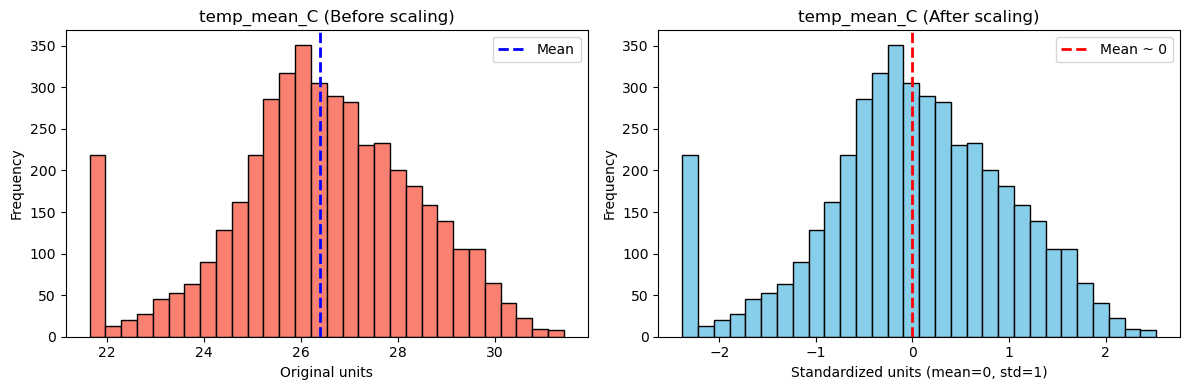

In [10]:
# Pick a continuous feature to visualize before vs after scaling
continuous_features = [
    "temp_mean_C","temp_max_C","temp_min_C",
    "rain_sum","sunshine_duration","daylight_duration",
    "wind_speed_max","et0_evapotranspiration"
]
# Keep only those that exist in the dataset
continuous_features = [c for c in continuous_features if c in df_ohe.columns]

# Example: take the first continuous feature
feature = continuous_features[0]   # e.g., temp_mean_C

fig, ax = plt.subplots(1,2, figsize=(12,4))

# --- Before scaling ---
ax[0].hist(df_ohe[feature], bins=30, edgecolor="black", color="salmon")
ax[0].set_title(f"{feature} (Before scaling)")
ax[0].set_xlabel("Original units")
ax[0].set_ylabel("Frequency")
ax[0].axvline(df_ohe[feature].mean(), color="blue", linestyle="dashed", linewidth=2, label="Mean")
ax[0].legend()

# --- After scaling ---
ax[1].hist(df_scaled[feature], bins=30, edgecolor="black", color="skyblue")
ax[1].set_title(f"{feature} (After scaling)")
ax[1].set_xlabel("Standardized units (mean=0, std=1)")
ax[1].set_ylabel("Frequency")
ax[1].axvline(df_scaled[feature].mean(), color="red", linestyle="dashed", linewidth=2, label="Mean ~ 0")
ax[1].legend()

plt.tight_layout()
plt.show()


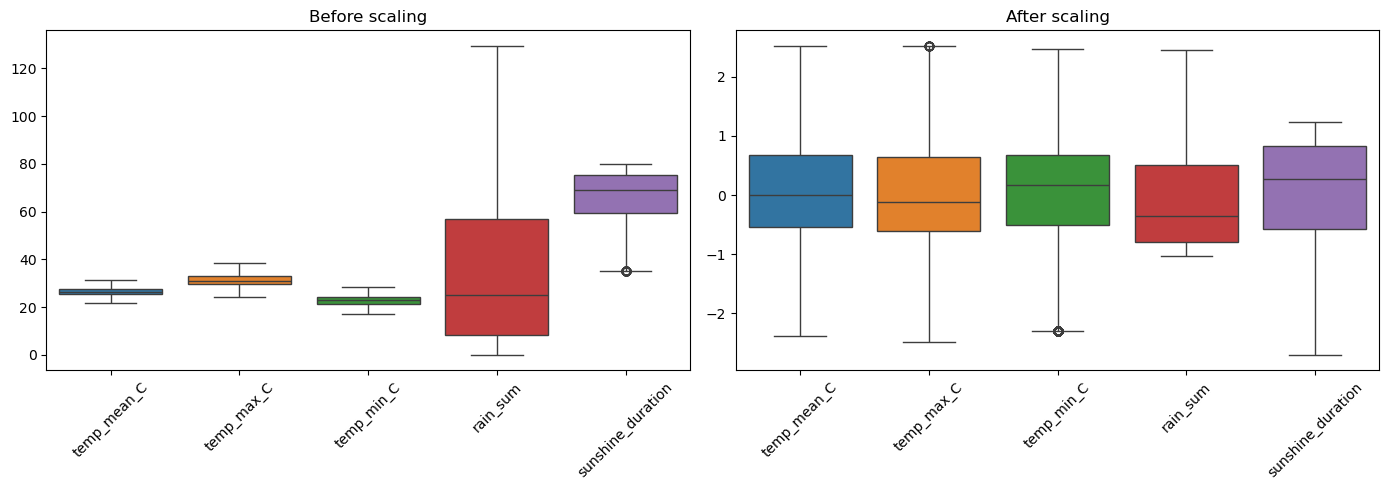

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define continuous features (not dummies, not target)
continuous_features = [
    "temp_mean_C","temp_max_C","temp_min_C",
    "rain_sum","sunshine_duration","daylight_duration",
    "wind_speed_max","et0_evapotranspiration"
]
continuous_features = [c for c in continuous_features if c in df_ohe.columns]

# Take a sample (first 5 if available)
sample_features = continuous_features[:5]

fig, ax = plt.subplots(1,2, figsize=(14,5))

# --- Before scaling ---
sns.boxplot(data=df_ohe[sample_features], ax=ax[0])
ax[0].set_title("Before scaling")
ax[0].tick_params(axis='x', rotation=45)

# --- After scaling ---
sns.boxplot(data=df_scaled[sample_features], ax=ax[1])
ax[1].set_title("After scaling")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
df_scaled.to_csv('DengueRisk_(Scaling  normalization (StandardScaler)].csv', index=False)